# Using diferents machine learning models

# Classification

### Preparing the data

In [114]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from sklearn.datasets import load_iris

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
df = pd.read_csv(url)

# iris = load_iris()
# df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [115]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [116]:
print(df.shape)
print(df.dtypes)

(150, 5)
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [117]:
import numpy as np

np.random.seed(42)

iris = df.sample(frac=1).reset_index(drop=True)

In [118]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.1,2.8,4.7,1.2,versicolor
1,5.7,3.8,1.7,0.3,setosa
2,7.7,2.6,6.9,2.3,virginica
3,6.0,2.9,4.5,1.5,versicolor
4,6.8,2.8,4.8,1.4,versicolor
5,5.4,3.4,1.5,0.4,setosa
6,5.6,2.9,3.6,1.3,versicolor
7,6.9,3.1,5.1,2.3,virginica
8,6.2,2.2,4.5,1.5,versicolor
9,5.8,2.7,3.9,1.2,versicolor


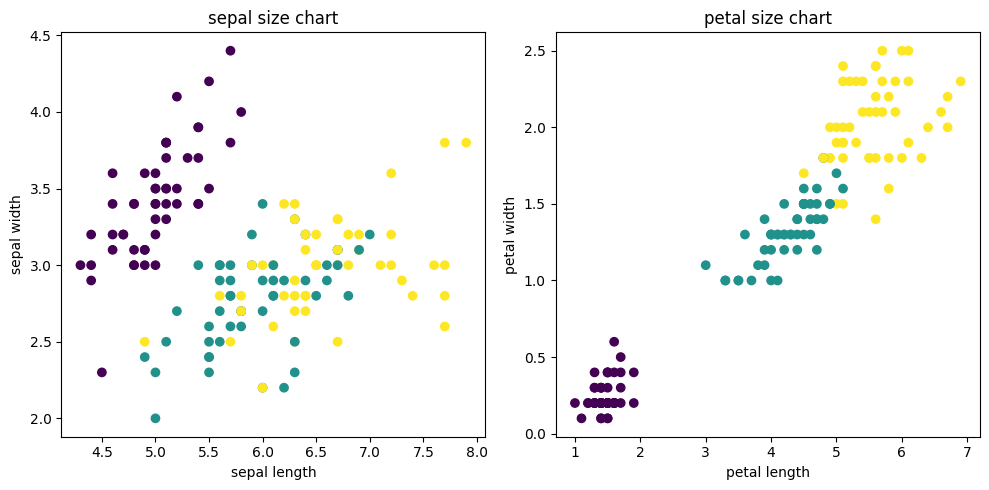

In [119]:
# visualizing the data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=iris['species'].astype('category').cat.codes, cmap='viridis')
plt.title('sepal size chart')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.subplot(122)
plt.scatter(iris['petal_length'], iris['petal_width'], c=iris['species'].astype('category').cat.codes, cmap='viridis')
plt.title('petal size chart')
plt.xlabel('petal length')
plt.ylabel('petal width')

plt.tight_layout()
plt.show()

#### Note: In the class, the dataset was first transformed into an array, and then the attributes and classes were separated.
In this example I am using `.iloc`.

array = iris.values

X = array[:, 0:4]

y = array[:, 4]

In [120]:
# separating features and targets

# X = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
# y = iris["species"]

X = iris.iloc[:, 0:4]
y = iris.iloc[:, -1] # -1 is refaring to the last column, I could use iris.iloc[:, 4] as well
X.head(), y.head()

(   sepal_length  sepal_width  petal_length  petal_width
 0           6.1          2.8           4.7          1.2
 1           5.7          3.8           1.7          0.3
 2           7.7          2.6           6.9          2.3
 3           6.0          2.9           4.5          1.5
 4           6.8          2.8           4.8          1.4,
 0    versicolor
 1        setosa
 2     virginica
 3    versicolor
 4    versicolor
 Name: species, dtype: object)

In [121]:
# separating training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using KFold for cross validation

In [122]:
from sklearn.model_selection import KFold

num_particoes = 3
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=42)

### Listing models to find the better one

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

import numpy as np

# random seed
np.random.seed(42)

# Listing the models, results and names

models = []
results = []
names = []

# adding models to the list

models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('LOGREG', LogisticRegression()))


In [124]:
models

[('KNN', KNeighborsClassifier()),
 ('DTree', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC()),
 ('LOGREG', LogisticRegression())]

### Models Execution

In [125]:
from sklearn.model_selection import cross_val_score

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: {cv_results.mean():.6f} ({cv_results.std():.6f})"
    print(msg)

KNN: 0.941667 (0.023570)
DTree: 0.900000 (0.035355)
NB: 0.916667 (0.051370)
SVM: 0.883333 (0.051370)
LOGREG: 0.916667 (0.042492)


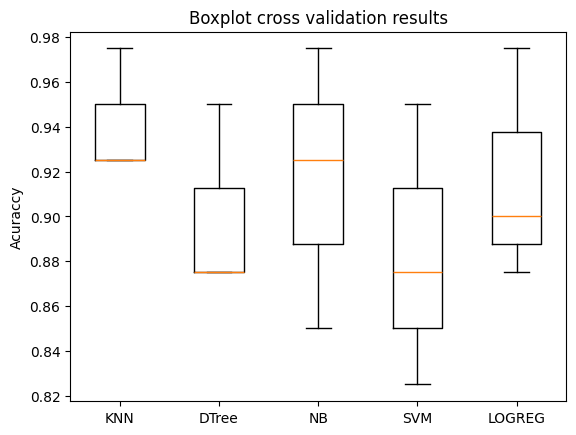

In [126]:
import matplotlib.pyplot as plt

plt.boxplot(results, labels=names)
plt.title('Boxplot cross validation results')
plt.ylabel('Acuraccy')
plt.show()

In [127]:
from sklearn.metrics import accuracy_score

# from sklearn.neighbors import KNeighborsClassifier (I aready imported the model)

model = KNeighborsClassifier()

# fitting the model
model.fit(X_train, y_train)

# making a prediction
y_pred = model.predict(X_test)

print(accuracy_score(y_test, y_pred))

1.0


In [128]:
# I'm getting three lines from my test data to simulate using teh new model
X_sample = X_test.iloc[:3]

In [129]:
print(X_sample)

     sepal_length  sepal_width  petal_length  petal_width
73            5.8          2.7           5.1          1.9
18            5.7          2.8           4.5          1.3
118           5.7          2.6           3.5          1.0


In [130]:
new_data = model.predict(X_sample)

In [131]:
new_data

array(['virginica', 'versicolor', 'versicolor'], dtype=object)

In [132]:
# making my own samples
X_sample2 = pd.DataFrame([
    [5.1, 3.5, 1.4, 0.2],
    [6.2, 3.4, 5.4, 2.3],
    [5.9, 3.0, 5.1, 1.8]
], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

In [133]:
# passing the samples to the model

new_data = model.predict(X_sample2)
new_data

array(['setosa', 'virginica', 'virginica'], dtype=object)

In [134]:
# using just one sample to show that it needs 2 dim
X_sample3 = pd.DataFrame([[6.2, 3.4, 5.4, 2.3]])

new_data = model.predict(X_sample3)
new_data

array(['virginica'], dtype=object)

# Regression

### Preparing the data

##### The goal is to teach the model to change Celsius degrees to Fahrenheit.

In [235]:
import numpy as np

# creating our Celsius data

np.random.seed(42)
data = np.array([round(np.random.uniform(0, 36), 1) for _ in range(200)], dtype=np.float64)
print(data.dtype)
print("dataset size =", len(data))
print(data)

float64
dataset size = 200
[13.5 34.2 26.4 21.6  5.6  5.6  2.1 31.2 21.6 25.5  0.7 34.9 30.   7.6
  6.5  6.6 11.  18.9 15.6 10.5 22.   5.  10.5 13.2 16.4 28.3  7.2 18.5
 21.3  1.7 21.9  6.1  2.3 34.2 34.8 29.1 11.   3.5 24.6 15.8  4.4 17.8
  1.2 32.7  9.3 23.9 11.2 18.7 19.7  6.7 34.9 27.9 33.8 32.2 21.5 33.2
  3.2  7.1  1.6 11.7 14.   9.8 29.8 12.8 10.1 19.5  5.1 28.9  2.7 35.5
 27.8  7.2  0.2 29.4 25.4 26.2 27.8  2.7 12.9  4.2 31.1 22.4 11.9  2.3
 11.2 11.7 26.3 23.  31.9 17.   4.3 25.7 27.4 20.2 27.8 17.8 18.8 15.4
  0.9  3.9  1.1 22.9 11.3 18.3 32.7  9.  14.8 27.2  8.2  2.8 10.4  5.8
 33.5 29.1 22.8 31.4 28.9  6.7 32.1 19.4 29.1 32.3 11.4  4.   8.2 15.4
 29.4 31.   0.3 18.4 15.   8.   4.3 12.2 33.9 11.6 18.7 25.3 13.1 35.
 34.6  9.1 17.9 10.8 10.3  1.3 21.9 18.1  1.9 10.  32.7  8.6  5.2 17.6
 35.5  8.7 24.2 27.4  8.6 26.2 13.2 22.8 22.8 19.3  3.3 30.1 11.5  6.7
  1.5 21.3 24.4  0.6 18.4  8.2 23.2  6.3 24.9 13.9 33.7  5.  12.3  4.1
 33.3 31.6  9.3 23.8 29.4 20.  19.1  8.7  3.4 32.3 

In [236]:
# creating our Farenheits data
labels = (9/5) * data +32

labels

array([56.3 , 93.56, 79.52, 70.88, 42.08, 42.08, 35.78, 88.16, 70.88,
       77.9 , 33.26, 94.82, 86.  , 45.68, 43.7 , 43.88, 51.8 , 66.02,
       60.08, 50.9 , 71.6 , 41.  , 50.9 , 55.76, 61.52, 82.94, 44.96,
       65.3 , 70.34, 35.06, 71.42, 42.98, 36.14, 93.56, 94.64, 84.38,
       51.8 , 38.3 , 76.28, 60.44, 39.92, 64.04, 34.16, 90.86, 48.74,
       75.02, 52.16, 65.66, 67.46, 44.06, 94.82, 82.22, 92.84, 89.96,
       70.7 , 91.76, 37.76, 44.78, 34.88, 53.06, 57.2 , 49.64, 85.64,
       55.04, 50.18, 67.1 , 41.18, 84.02, 36.86, 95.9 , 82.04, 44.96,
       32.36, 84.92, 77.72, 79.16, 82.04, 36.86, 55.22, 39.56, 87.98,
       72.32, 53.42, 36.14, 52.16, 53.06, 79.34, 73.4 , 89.42, 62.6 ,
       39.74, 78.26, 81.32, 68.36, 82.04, 64.04, 65.84, 59.72, 33.62,
       39.02, 33.98, 73.22, 52.34, 64.94, 90.86, 48.2 , 58.64, 80.96,
       46.76, 37.04, 50.72, 42.44, 92.3 , 84.38, 73.04, 88.52, 84.02,
       44.06, 89.78, 66.92, 84.38, 90.14, 52.52, 39.2 , 46.76, 59.72,
       84.92, 87.8 ,

In [237]:
import pandas as pd

# creating the dataframe

df = pd.DataFrame({
    'Celsius': data,
    'Fahrenheit': labels
})

print(df.head(10))

   Celsius  Fahrenheit
0     13.5       56.30
1     34.2       93.56
2     26.4       79.52
3     21.6       70.88
4      5.6       42.08
5      5.6       42.08
6      2.1       35.78
7     31.2       88.16
8     21.6       70.88
9     25.5       77.90


In [238]:
len(df['Celsius']), len(df['Fahrenheit'])

(200, 200)

In [239]:
X = df.iloc[:, 0]
y = df.iloc[:, 1]

X = np.expand_dims(X, axis=-1)
# or i could use X = X.reshape(-1, 1)

X.shape, df['Celsius'].shape

((200, 1), (200,))

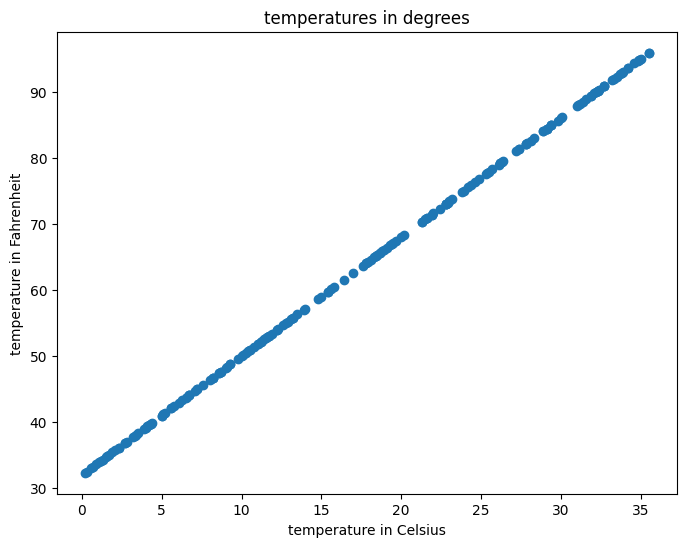

In [240]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.title('temperatures in degrees')
plt.xlabel('temperature in Celsius')
plt.ylabel('temperature in Fahrenheit')

plt.show()

In [241]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(160, 1)

### Testing models with KFold

In [242]:
from sklearn.model_selection import KFold

n_folds = 10
kfold = KFold(n_splits = n_folds, shuffle=True, random_state=42)

In [243]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
# regularization functions
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

np.random.seed(42)

models = []
results = []
names = []

models.append(('KNN', KNeighborsRegressor()))
models.append(('Tree', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('LR', LinearRegression()))
models.append(('Lasso', Lasso()))
models.append(('Ridge', Ridge()))

In [244]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
# making the models iterations one by one

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="neg_mean_squared_error")
    results.append(cv_results)
    names.append(name)
    msg = f"{name}: MSE {abs(cv_results.mean()):.3f} ({cv_results.std():.3f}) - RMSE {np.sqrt(abs(cv_results.mean())):.3f}"
    print(msg)

KNN: MSE 0.170 (0.106) - RMSE 0.413
Tree: MSE 0.106 (0.043) - RMSE 0.326
SVR: MSE 10.268 (5.663) - RMSE 3.204
LR: MSE 0.000 (0.000) - RMSE 0.000
Lasso: MSE 0.009 (0.003) - RMSE 0.096
Ridge: MSE 0.000 (0.000) - RMSE 0.001


In [246]:
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(mse)

0.0


In [259]:
result = model.predict([[36]])
result

array([96.8])